Mandy's Breast Cancer Project Part 3 Regression

 After the success of the second part of the campaign, the medical insurance company has become more and more into the idea of awareness-raising campaigns. However, the board needs confirmation on the company’s expenses to make sure of their financial status.
Before you can look at the financial reports, you are required to perform regression modeling on an insurance dataset to predict the expenses based on some information about patients.
You are required to:

    Perform EDA and visualization on the dataset.
    Implement different regression models.
    Get an acceptable R-squared score.


Read the Dataset
Read the dataset into a Pandas DataFrame.
Does the dataset include any missing values? If so, drop them.
Hint:
Pandas can do that with one line of code!
Perform Preprocessing
Perform any needed pre-processing on the chosen features including:

    Scaling.
    Encoding.
    Dealing with Nan values.
    Normalization.

Prepare Visualization
You are required to deliver a number of visualization for your dataset, including:

    Pair plots for the features.
    A correlation matrix heat map.
    Box plots for the features.

Hint:
Feel free to add any other visualizations you would like!
Split the Data
Split your data as follows:

    80% training set.
    10% validation set.
    10% test set.

Training Regressors

    Use decision trees, random forests and SVRs to fit your data.
    Get r2 scores, MSE scores and MAE scores.
    You need a minimum r2 score of 82%.
    Compare the results of different models.

Hint:
You need to choose the optimal value for the criteria for both decision trees and random forests using cross-validation.
Submit Your GitHub Link Here :

Copy and paste your GitHub link in the field below, then click Submit. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
label = LabelEncoder()
enc = OneHotEncoder()
scaler = StandardScaler()

In [3]:
dataset = pd.read_csv("insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#let's take a look at a bit of info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#and check for NaN values - none found
nan_count = dataset.isna().sum()

print(nan_count)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
#to see the pairplot better i'll first do a label encode version for visualization
datasetlabel = dataset.copy()
datasetlabel['sex'] = label.fit_transform(datasetlabel['sex'])
datasetlabel['smoker'] = label.fit_transform(datasetlabel['smoker'])
datasetlabel['region'] = label.fit_transform(datasetlabel['region'])
datasetlabel.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


c:\Users\hyppi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyppi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hyppi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyppi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

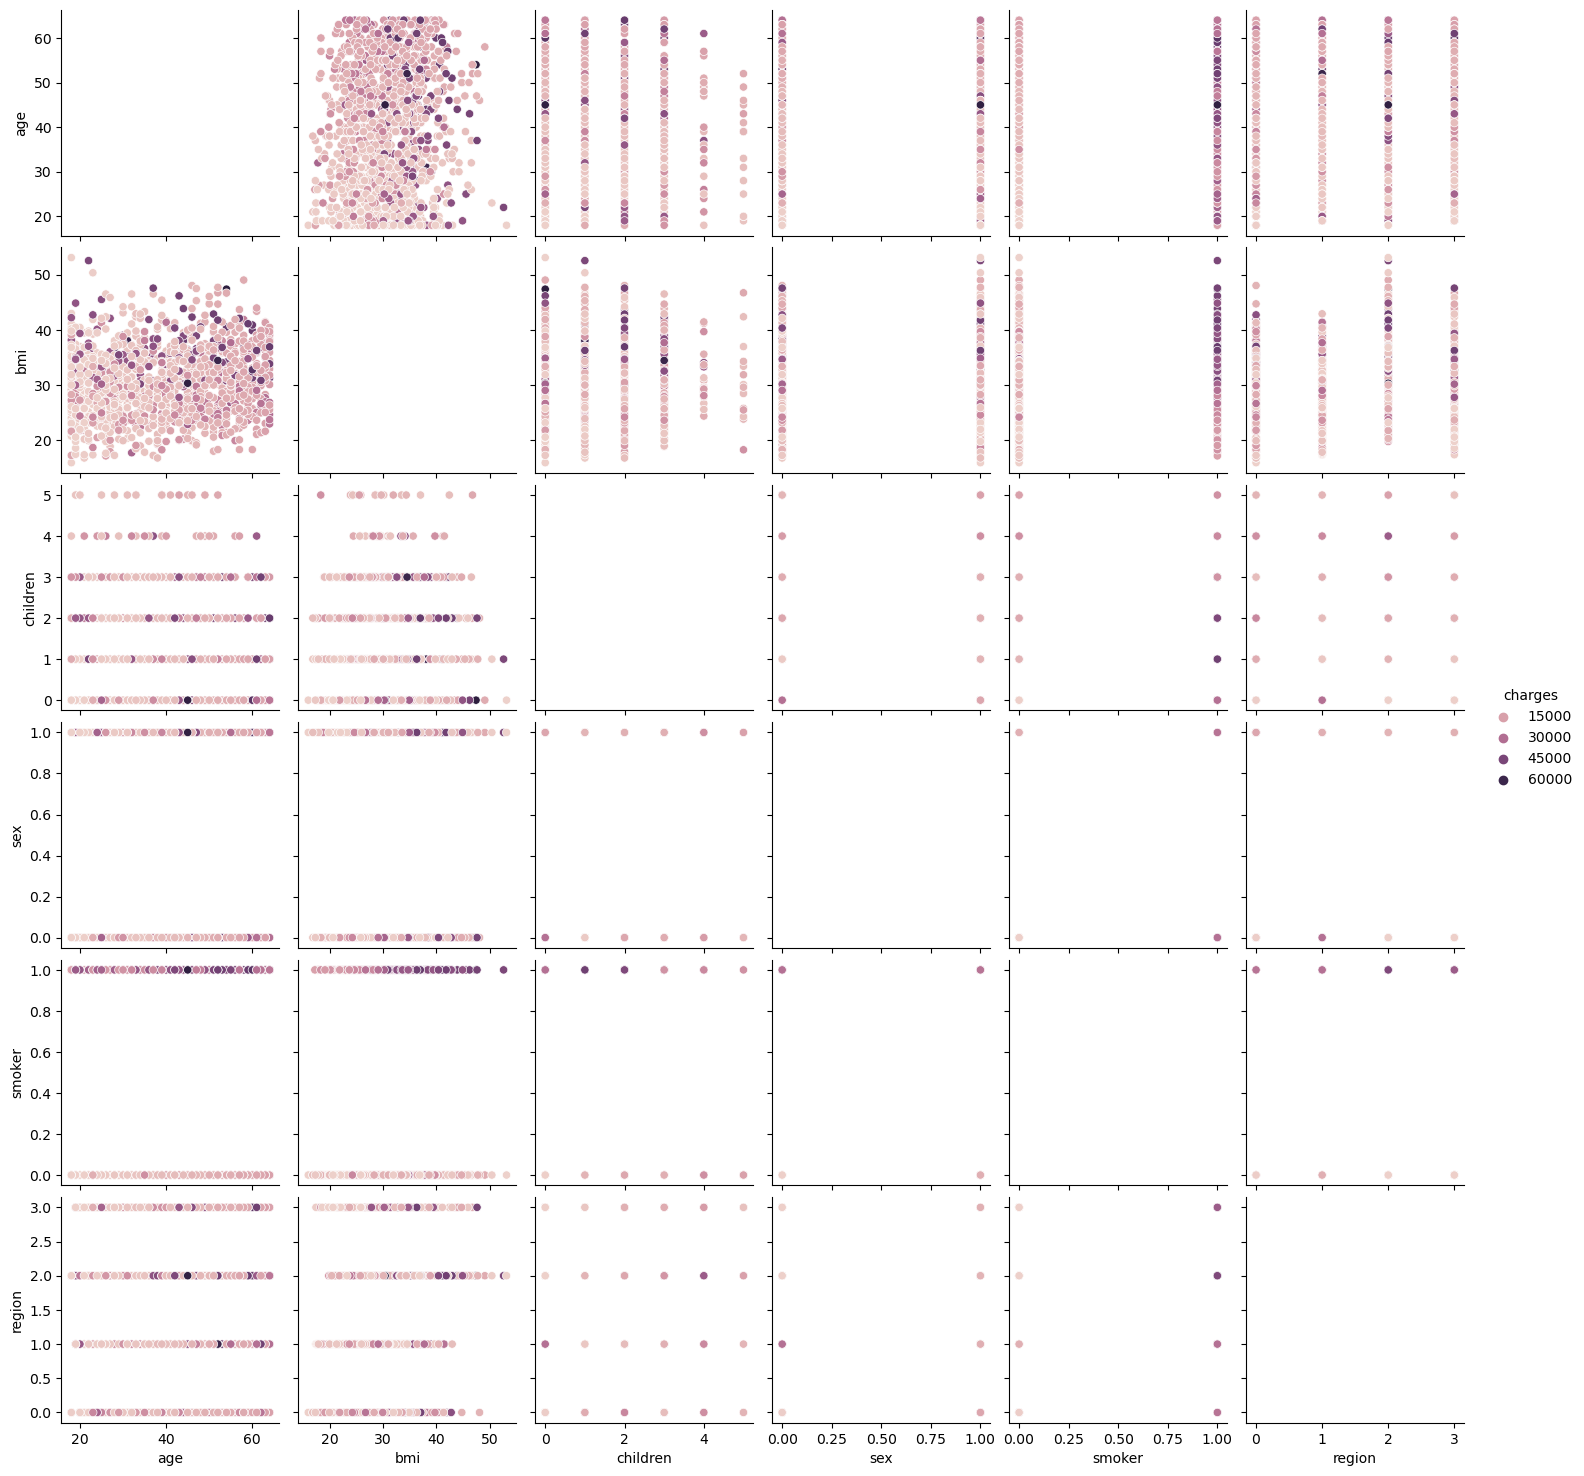

In [8]:
#Now that that's ready let's start with a pair plot
sns.pairplot(datasetlabel, hue = "charges", vars =['age', 'bmi', 'children', 'sex', 'smoker', 'region'])
plt.show()
#it seems like a lot would look more explanatory possibly with a bar plot instead so we will also try that

In [9]:
dataset_smoker = datasetlabel.groupby(['smoker'])['charges'].mean()
dataset_smoker
dataset_sex = datasetlabel.groupby(['sex'])['charges'].mean()
dataset_sex
dataset_region = datasetlabel.groupby(['region'])['charges'].mean()
dataset_region
dataset_children = datasetlabel.groupby(['children'])['charges'].mean()
dataset_children

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

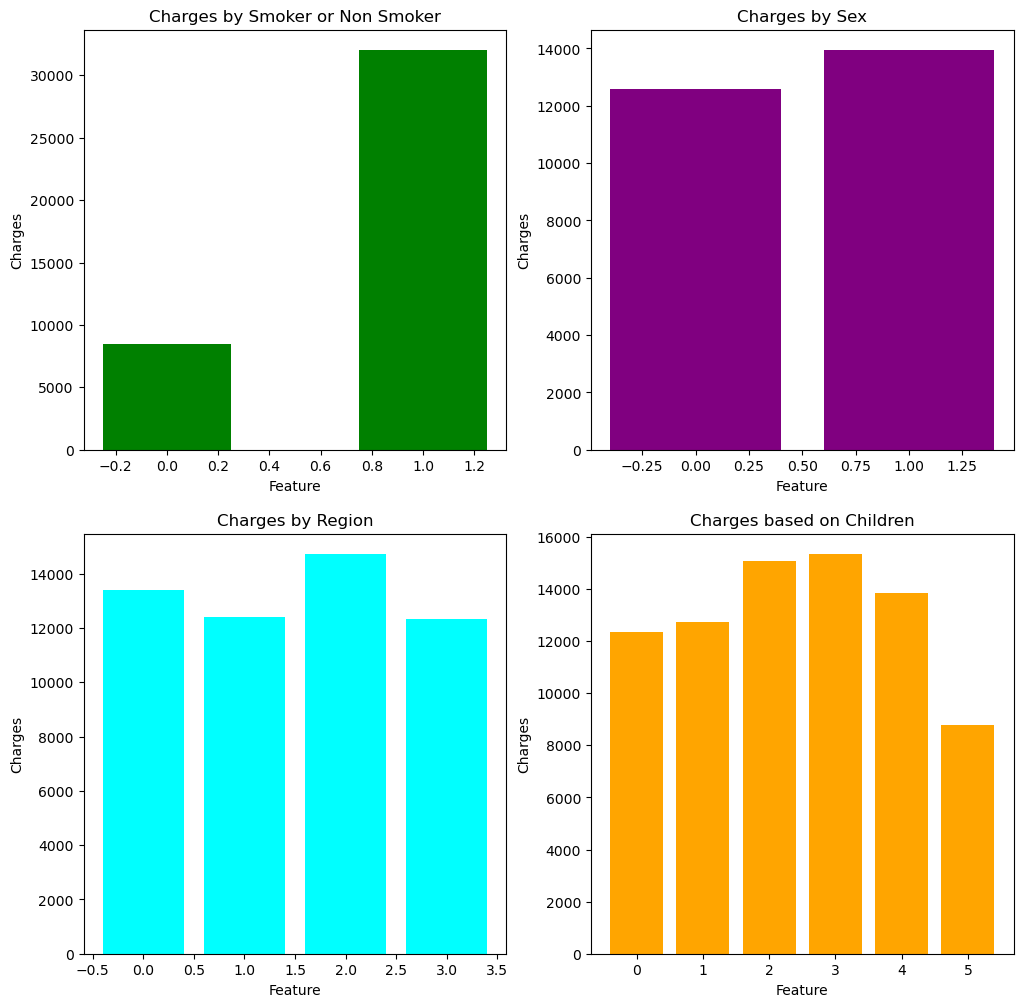

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0, 0].bar(dataset_smoker.index, dataset_smoker.values, width=0.5, color='green')
axs[0, 0].set_title('Charges by Smoker or Non Smoker')
axs[0, 1].bar(dataset_sex.index, dataset_sex.values, color='purple')
axs[0, 1].set_title('Charges by Sex')
axs[1, 0].bar(dataset_region.index, dataset_region.values, color='cyan')
axs[1, 0].set_title('Charges by Region')
axs[1, 1].bar(dataset_children.index, dataset_children.values, color='orange')
axs[1, 1].set_title('Charges based on Children')

for ax in axs.flat:
    ax.set(xlabel='Feature', ylabel='Charges')



In [11]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Time to Encode for one hot and scaling, the label encoding was just for visualizing so we can look at it
datasetonehot = pd.get_dummies(dataset[['children', 'sex', 'smoker', 'region']], dtype=int)
datasetonehot.head(5)


,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,0,0,1,0
2,3,0,1,1,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0


In [13]:
dataset = pd.concat([dataset[['age', 'bmi', 'charges']], datasetonehot], axis=1) 
dataset.head(5)

,age,bmi,charges,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,1,0,0,0,1
1,18,33.770,1725.55230,1,0,1,1,0,0,0,1,0
2,28,33.000,4449.46200,3,0,1,1,0,0,0,1,0
3,33,22.705,21984.47061,0,0,1,1,0,0,1,0,0
4,32,28.880,3866.85520,0,0,1,1,0,0,1,0,0


In [14]:
#list the column names
list(dataset.columns.values)

['age',
 'bmi',
 'charges',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [15]:
# Then scale
dataset[['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']] = scaler.fit_transform(dataset[['age',
 'bmi', 'children', 'charges', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']])
dataset.head(5)

,age,bmi,charges,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0.298584,-0.908614,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.953689,-0.078767,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,-0.728675,1.580926,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,0.719843,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.776802,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


Text(0.5, 1.0, 'Correlated Heatmap on Insurance Features')

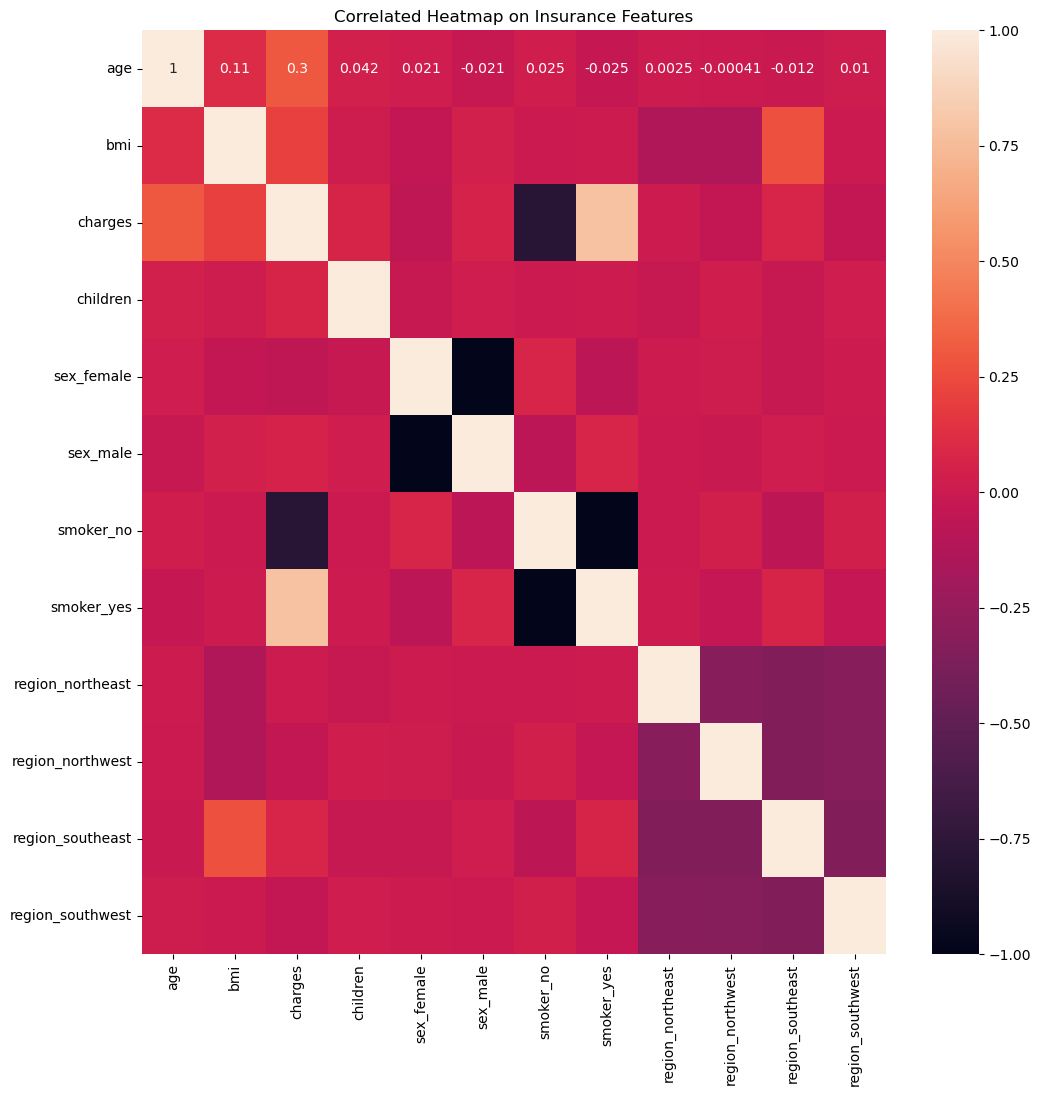

In [16]:
# and  then a heatmap

plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), annot=True).set_title('Correlated Heatmap on Insurance Features')

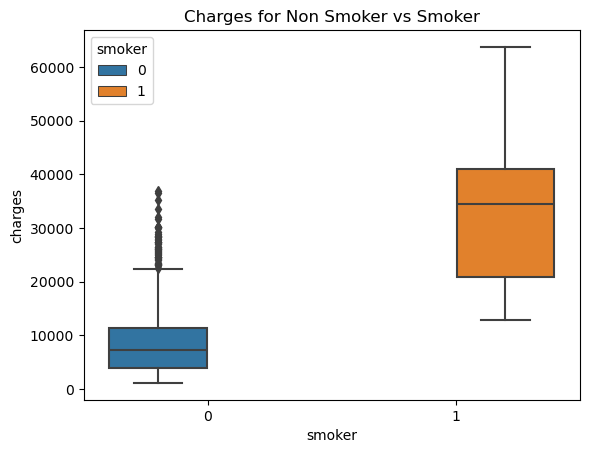

In [17]:
#and finally box plot for features

#[["age", "bmi", "children","sex", "smoker", "region"]]

sns.boxplot(x="smoker", y="charges", data = datasetlabel,hue=datasetlabel["smoker"]).set_title("Charges for Non Smoker vs Smoker")

plt.show()

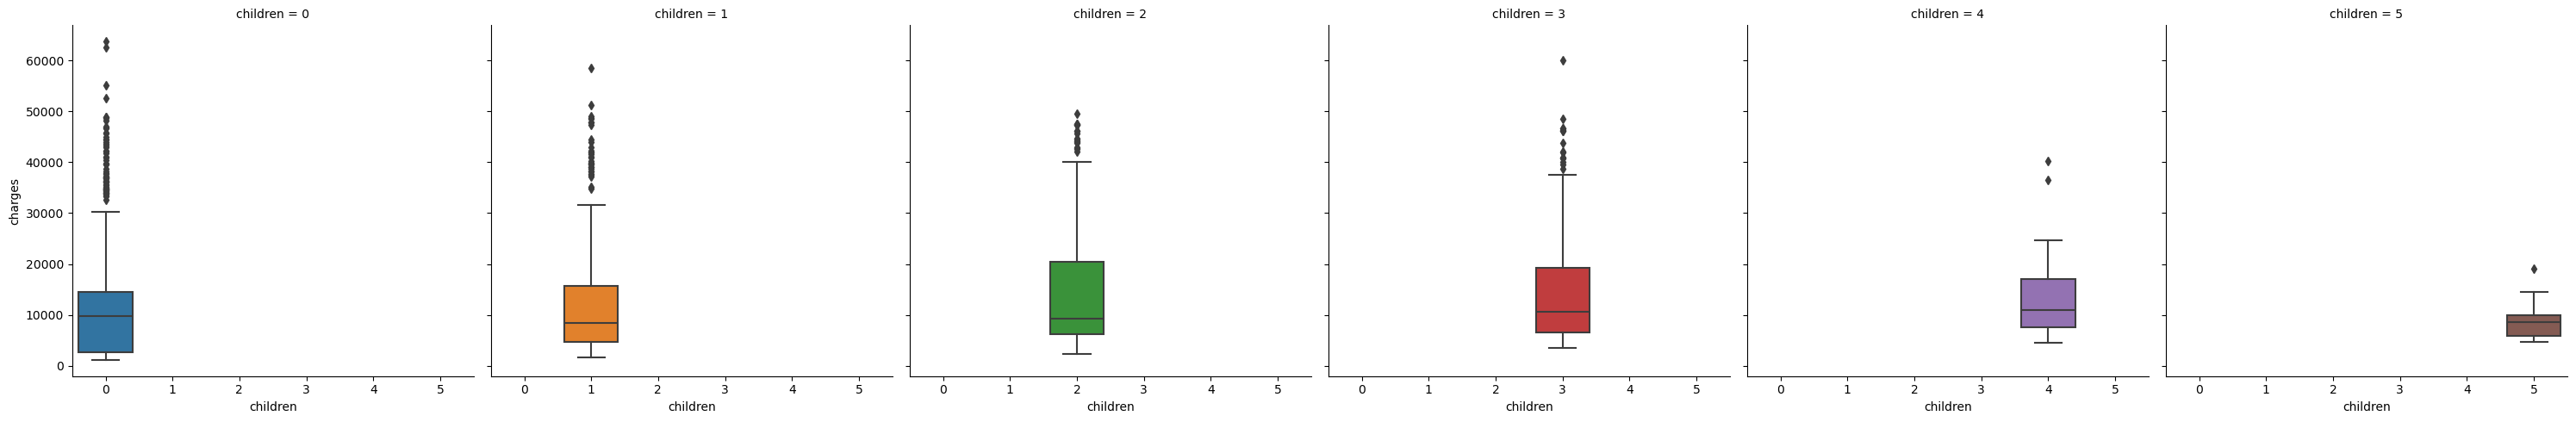

In [18]:
sns.catplot(datasetlabel, x="children", y= "charges", col="children", kind = "box")

In [19]:
# and then train/test/split
encoded_y = dataset["charges"].values

dataset.drop(columns =["charges"], axis=1, inplace=True)
encoded_x = dataset.iloc[:, :].values

# train is now 80% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(encoded_x, encoded_y, random_state=0, test_size=0.2)

print(len(X_train), len(X_test))
# test is now 10% of the initial data set
# validation is now 10% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) 
print(len(X_train), len(X_val), len(X_test))


1070 268
1070 134 134


In [20]:
dataset

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
1334,-1.509965,0.206139,-0.908614,1.010519,-1.010519,0.507463,-0.507463,1.769076,-0.566418,-0.611324,-0.566418
1335,-1.509965,1.014878,-0.908614,1.010519,-1.010519,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
1336,-1.296362,-0.797813,-0.908614,1.010519,-1.010519,0.507463,-0.507463,-0.565267,-0.566418,-0.611324,1.765481


In [21]:
#to later score the scores against each other i'll create a list and append each model score into it
models = []

In [22]:
#We will try with squared_error 1st, then “friedman_mse”, “absolute_error" to see what performs best
modelTree_SE = DecisionTreeRegressor(criterion="squared_error").fit(X_train, y_train)
y_pred_SE = modelTree_SE.predict(X_test) 
print(y_pred_SE)

scoreDT_SE = modelTree_SE.score(X_test, y_test)
print("score with criterion squared error = ", scoreDT_SE)

models.append(scoreDT_SE)

y_pred_SE = modelTree_SE.predict(X_test)
print("Mean Squared Error with criterion squared error  = ", mean_squared_error(y_test, y_pred_SE))

[-0.73684845 -0.99277437 -0.96120468 -0.27365287  2.8103486  -0.35538372
 -0.72995889  2.45451019 -0.72995889 -0.23864749 -0.73933522  0.06036202
 -0.85689246 -0.28660843 -0.83076393  0.71984298 -0.56842369 -0.75472729
  1.34259333 -0.83076393  2.3732298   1.08395806 -0.1889987   0.01310258
  0.65994512 -0.87476652 -0.97105381  1.80075002 -0.36940521 -0.66588356
 -0.68956398  0.06086495 -0.2930616  -0.23522441 -0.20429467  4.07438867
 -0.85555046  0.71936438 -0.8447583  -0.88995889 -0.46638299 -0.12360207
  2.20668596 -0.91442775 -0.34880015 -0.78580722 -0.3583779  -0.7459866
  4.07438867 -0.91289008  0.9418244   0.04563062 -0.85443562 -0.96022527
 -0.53875009 -0.9010951  -0.70252454  0.21134217 -0.28067618 -0.20473878
 -0.93266418  0.52892664  2.99923879  0.9418244  -0.09696192 -0.07150008
  0.99648305  1.910469   -0.57808052 -0.98128192  3.45834801  2.71448061
  0.6930336   1.69178431  0.52892664 -0.98128192  0.03759036 -0.62591394
 -0.49603298 -0.31582146 -0.42577009  1.80720609  2.

In [23]:
modelTree_FMSE = DecisionTreeRegressor(criterion="friedman_mse").fit(X_train, y_train)
y_pred_FMSE = modelTree_FMSE.predict(X_test) 
print(y_pred_FMSE)
scoreDT_FMSE = modelTree_FMSE.score(X_test, y_test)
print("score with criterion friedman_mse = ", scoreDT_FMSE)
models.append(scoreDT_FMSE)

y_pred_FMSE = modelTree_FMSE.predict(X_test)
print("Mean Squared Error with criterion friedman_mse  = ", mean_squared_error(y_test, y_pred_FMSE))

[-0.73684845 -0.99277437 -0.96120468 -0.27365287  2.8103486  -0.36637585
 -0.72995889  2.55522446 -0.72995889 -0.23864749 -0.66192427  0.06036202
 -0.85689246 -0.28660843 -0.83076393 -0.70252454 -0.56842369 -0.75472729
  1.45981508 -0.84460559  2.3732298   1.08395806 -0.1889987   0.01310258
  0.65994512 -0.87476652 -0.97105381  1.80075002 -0.36940521 -0.7063656
 -0.68956398  0.06036202 -0.2930616  -0.20437612 -0.20429467  4.07438867
 -0.85555046  0.71936438 -0.83076393 -0.88995889 -0.46638299 -0.12360207
  2.20668596 -0.91442775 -0.34880015 -0.78580722  1.06314931 -0.7459866
  4.07438867  1.19399318  0.9418244   0.04631726 -0.85443562 -0.96022527
 -0.53875009 -0.9010951  -0.49912966  0.21134217 -0.28067618 -0.20473878
 -0.95352498  0.52892664  2.99923879  0.9418244  -0.09696192 -0.07150008
  0.99648305  1.910469   -0.57808052 -0.98128192  2.20668596  2.62183079
  0.75929395  1.72614734  0.52892664 -0.98128192  0.03759036 -0.62591394
 -0.48133381 -0.31582146 -0.42577009  1.80720609  2.7

In [24]:
modelTree_AE = DecisionTreeRegressor(criterion="absolute_error", max_depth=10).fit(X_train, y_train)
y_pred_AE = modelTree_AE.predict(X_test) 

scoreDT_AE = modelTree_AE.score(X_test, y_test)
print("score with criterion absolute_error = ", scoreDT_AE)
models.append(scoreDT_AE)

y_pred_AE = modelTree_AE.predict(X_test)
print("Mean Squared Error with criterion absolute_error  = ", mean_squared_error(y_test, y_pred_AE))

score with criterion absolute_error =  0.7484937166140364
Mean Squared Error with criterion absolute_error  =  0.3252807739016313


In [25]:
#SVR 

modelSVRlinear = SVR(kernel='linear', max_iter=1000).fit(X_train, y_train)
y_pred = modelSVRlinear.predict(X_test)

scoreLR = modelSVRlinear.score(X_test, y_test)
models.append(scoreLR)
print(scoreLR)

0.7998785150250114


c:\Users\hyppi\anaconda3\envs\main\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [26]:
y_pred = modelSVRlinear.predict(X_test)
mean_squared_error(y_test, y_pred)

0.258823241434138

In [27]:
scores = []
nums = range(1,26)
best_knn = []
best_score_i = -1000

for i in nums:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_i = knn.score(X_test, y_test)
    scores.append(score_i)
    
    if score_i > best_score_i:
        best_score_i = score_i
        best_knn = i

print(best_knn)

4


In [28]:
#KNN

model = KNeighborsRegressor(n_neighbors = 4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

y_pred = model.predict(X_test)

score_KNN = model.score(X_test, y_test)
models.append(score_KNN)
print(score_KNN)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8567209365643991
0.1853071979387145
0.27966526633355715


The best one was KNN with 4 neighbours which i'll show the comparisons below with a bar plot

In [29]:
print(models)

[0.6901828253533056, 0.6665134790965941, 0.7484937166140364, 0.7998785150250114, 0.8567209365643991]


c:\Users\hyppi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

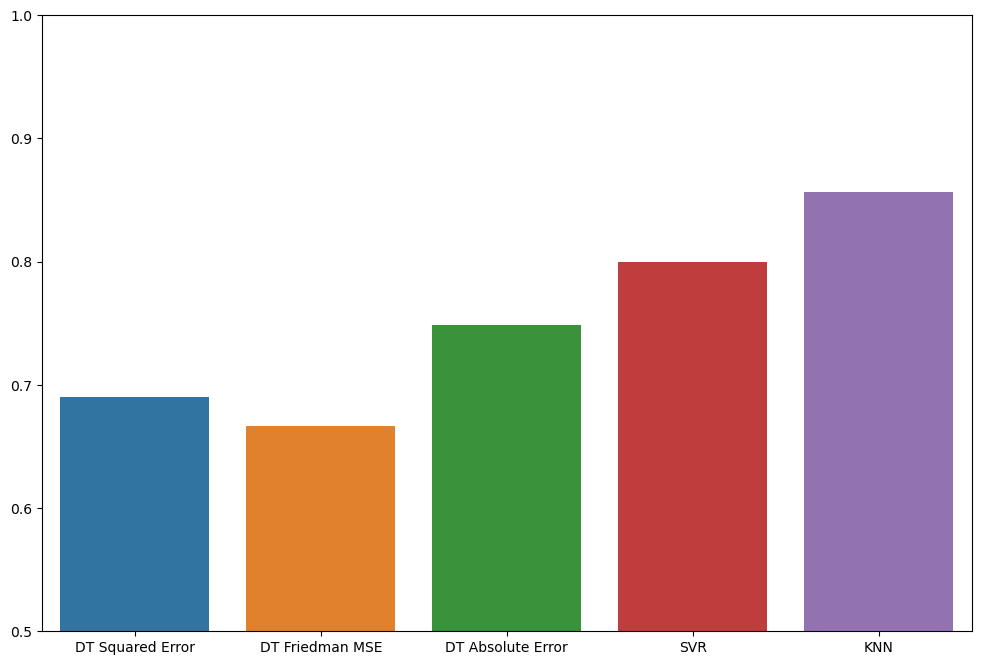

In [30]:
plt.figure(figsize=(12,8))
plt.ylim(.5, 1)
sns.barplot(x=["DT Squared Error", "DT Friedman MSE", "DT Absolute Error", "SVR", "KNN"], y= models)

As you can see, KNN is the best performer, followed by SVR Linear and then DT Absolute Error criterion performed closely behind.